In [2]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
from itertools import cycle
from sklearn.metrics import mean_squared_error
from fbprophet import Prophet
from tqdm import tqdm_notebook as tqdm



pd.set_option('max_columns', 50)
plt.style.use('bmh')

In [3]:
train = pd.read_csv("sales_train_validation_afcs2020.csv")
prices = pd.read_csv("sell_prices_afcs2020.csv")
calender = pd.read_csv("calendar_afcs2020.csv")
sample = pd.read_csv("sample_submission_afcs2020.csv")
evaluation = pd.read_csv("sales_train_evaluation_afcs2020.csv")



In [4]:
sales = train.set_index('id').T.reset_index()

In [5]:
datetime = calender[["date","d"]]
merged1 = pd.merge(left=sales,right=datetime,left_on="index",right_on="d",how="left")
merged1["date"] = pd.to_datetime(merged1["date"])

In [6]:
merged2 = merged1.drop(["d","index"],axis=1)
merged3 = merged2.rename({"date":"ds"},axis=1)

In [7]:
merged3.head()

,HOBBIES_2_001_CA_3_validation,HOBBIES_2_002_CA_3_validation,HOBBIES_2_003_CA_3_validation,HOBBIES_2_004_CA_3_validation,HOBBIES_2_005_CA_3_validation,HOBBIES_2_006_CA_3_validation,HOBBIES_2_007_CA_3_validation,HOBBIES_2_008_CA_3_validation,HOBBIES_2_009_CA_3_validation,HOBBIES_2_010_CA_3_validation,HOBBIES_2_011_CA_3_validation,HOBBIES_2_012_CA_3_validation,HOBBIES_2_013_CA_3_validation,HOBBIES_2_014_CA_3_validation,HOBBIES_2_015_CA_3_validation,HOBBIES_2_016_CA_3_validation,HOBBIES_2_017_CA_3_validation,HOBBIES_2_018_CA_3_validation,HOBBIES_2_019_CA_3_validation,HOBBIES_2_020_CA_3_validation,HOBBIES_2_021_CA_3_validation,HOBBIES_2_022_CA_3_validation,HOBBIES_2_023_CA_3_validation,HOBBIES_2_024_CA_3_validation,HOBBIES_2_025_CA_3_validation,...,HOBBIES_2_126_CA_3_validation,HOBBIES_2_127_CA_3_validation,HOBBIES_2_128_CA_3_validation,HOBBIES_2_129_CA_3_validation,HOBBIES_2_130_CA_3_validation,HOBBIES_2_131_CA_3_validation,HOBBIES_2_132_CA_3_validation,HOBBIES_2_133_CA_3_validation,HOBBIES_2_134_CA_3_validation,HOBBIES_2_135_CA_3_validation,HOBBIES_2_136_CA_3_validation,HOBBIES_2_137_CA_3_validation,HOBBIES_2_138_CA_3_validation,HOBBIES_2_139_CA_3_validation,HOBBIES_2_140_CA_3_validation,HOBBIES_2_141_CA_3_validation,HOBBIES_2_142_CA_3_validation,HOBBIES_2_143_CA_3_validation,HOBBIES_2_144_CA_3_validation,HOBBIES_2_145_CA_3_validation,HOBBIES_2_146_CA_3_validation,HOBBIES_2_147_CA_3_validation,HOBBIES_2_148_CA_3_validation,HOBBIES_2_149_CA_3_validation,ds
0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2011-01-29
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,2011-01-30
2,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,...,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2011-01-31
3,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,3,0,4,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,2011-02-01
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2011-02-02


In [8]:
train_input = merged3[:-28]
val_input = merged3[-28:]

In [9]:
#train (baseline)

predictions1 = []
for i in tqdm(range(len(train_input.columns)-1)):
    model = Prophet()
    productName = merged3.columns[i]
    df = pd.DataFrame()
    df['y'] = train_input[productName]
    df['ds'] = train_input['ds']
    model.fit(df)
    future = model.make_future_dataframe(28,include_history=False)
    pred = model.predict(future)['yhat']
    predictions1.append(list(pred))

<ipython-input-9-cf23c6ce6d44>:4: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i in tqdm(range(len(train_input.columns)-1)):


INFO:numexpr.utils:NumExpr defaulting to 8 threads.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling daily

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=Tru

RMSE: 12.337911746210516


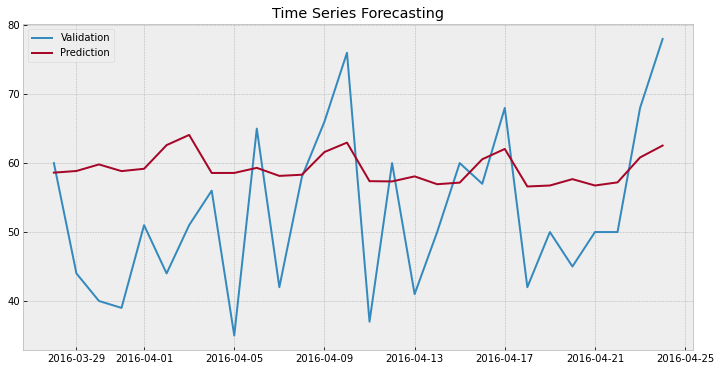

In [10]:
forecastProphet_baseline = pd.DataFrame(predictions1).T
summed = forecastProphet_baseline.T.sum()
groundtruth = val_input.drop('ds',axis=1).T.sum()

plt.figure(figsize=(12,6))
plt.plot(val_input["ds"],groundtruth,label="Validation")
plt.plot(val_input["ds"],summed,label="Prediction")

plt.title("Time Series Forecasting")
plt.legend()

#RMSE of naive algorithm
rmse =  np.sqrt(mean_squared_error(groundtruth,summed))
print("RMSE:",rmse)

In [11]:
#train with seasonality
predictions_wSeason = []
for i in tqdm(range(len(train_input.columns)-1)):
    model = Prophet(daily_seasonality=True)
    productName = merged3.columns[i]
    df = pd.DataFrame()
    df['y'] = train_input[productName]
    df['ds'] = train_input['ds']
    model.fit(df)
    future = model.make_future_dataframe(28,include_history=False)
    pred = model.predict(future)['yhat']
    predictions_wSeason.append(list(pred))

<ipython-input-11-f3de324b9fda>:3: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i in tqdm(range(len(train_input.columns)-1)):


RMSE: 12.288993082719093


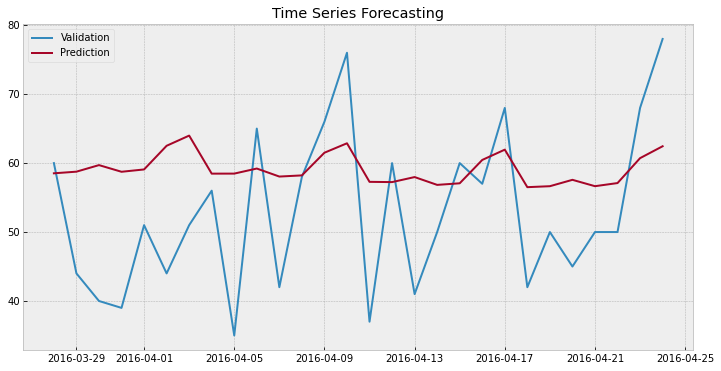

In [12]:
forecastProphet_baseline = pd.DataFrame(predictions_wSeason).T
summed = forecastProphet_baseline.T.sum()
groundtruth = val_input.drop('ds',axis=1).T.sum()

plt.figure(figsize=(12,6))
plt.plot(val_input["ds"],groundtruth,label="Validation")
plt.plot(val_input["ds"],summed,label="Prediction")

plt.title("Time Series Forecasting")
plt.legend()

#RMSE of naive algorithm, seasonality did not improve prediction
rmse =  np.sqrt(mean_squared_error(groundtruth,summed))
print("RMSE:",rmse)

In [15]:
import pmdarima as pm

In [23]:
#Arima 
predictions_Arima = []
for i in tqdm(range(len(train_input.columns)-1)):

    productName = merged3.columns[i]
    df = pd.DataFrame()
    df['y'] = train_input[productName]
    df['ds'] = train_input['ds']
    df = df.set_index('ds')
    model = pm.auto_arima(df,start_p=0,start_q=0,test="adf",max_p=3,max_q=3,error_action="ignore",suppress_warnings=True,seasonal=False)

    pred = model.predict(28)
    predictions_Arima.append(list(pred))

<ipython-input-23-de47927cc545>:3: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i in tqdm(range(len(train_input.columns)-1)):


RMSE: 12.059682885258288


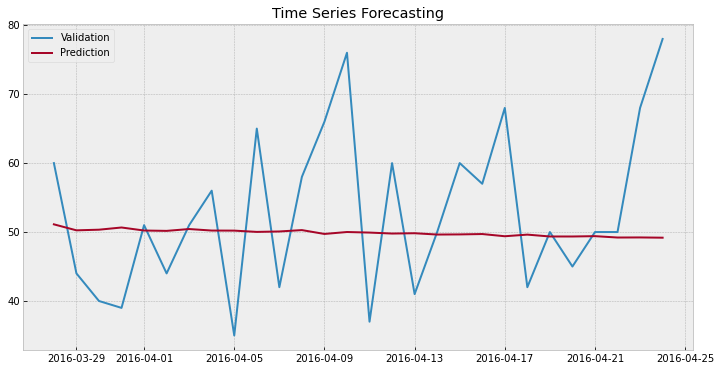

In [25]:
predictions_Arimadf = pd.DataFrame(predictions_Arima).T
summed = predictions_Arimadf.T.sum()
groundtruth = val_input.drop('ds',axis=1).T.sum()

plt.figure(figsize=(12,6))
plt.plot(val_input["ds"],groundtruth,label="Validation")
plt.plot(val_input["ds"],summed,label="Prediction")

plt.title("Time Series Forecasting")
plt.legend()

#RMSE of naive algorithm, seasonality did not improve prediction
rmse =  np.sqrt(mean_squared_error(groundtruth,summed))
print("RMSE:",rmse)

In [26]:
#Arima 
predictions_Ar = []
for i in tqdm(range(len(train_input.columns)-1)):

    productName = merged3.columns[i]
    df = pd.DataFrame()
    df['y'] = train_input[productName]
    df['ds'] = train_input['ds']
    df = df.set_index('ds')
    model = pm.auto_arima(df,start_p=0,start_q=0,test="adf",max_p=3,max_q=0,error_action="ignore",suppress_warnings=True,seasonal=False)

    pred = model.predict(28)
    predictions_Ar.append(list(pred))

<ipython-input-26-a7d957f9af0f>:3: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i in tqdm(range(len(train_input.columns)-1)):


RMSE: 12.059682885258288


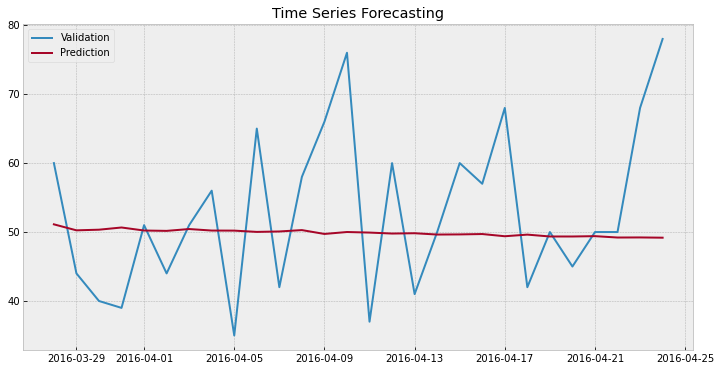

In [27]:
predictions_Ar = pd.DataFrame(predictions_Arima).T
summed = predictions_Ar.T.sum()
groundtruth = val_input.drop('ds',axis=1).T.sum()

plt.figure(figsize=(12,6))
plt.plot(val_input["ds"],groundtruth,label="Validation")
plt.plot(val_input["ds"],summed,label="Prediction")

plt.title("Time Series Forecasting")
plt.legend()

#RMSE of naive algorithm, seasonality did not improve prediction
rmse =  np.sqrt(mean_squared_error(groundtruth,summed))
print("RMSE:",rmse)

In [33]:
#Ar with season
predictions_Ar_w_season = []
for i in tqdm(range(len(train_input.columns)-1)):

    productName = merged3.columns[i]
    df = pd.DataFrame()
    df['y'] = train_input[productName]
    df['ds'] = train_input['ds']
    df = df.set_index('ds')
    model = pm.auto_arima(df,start_p=0,start_q=0,test="adf",max_p=3,max_q=0,error_action="ignore",suppress_warnings=True,seasonal=True)

    pred = model.predict(28)
    predictions_Ar_w_season.append(list(pred))

<ipython-input-33-2aac0156dbb4>:3: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i in tqdm(range(len(train_input.columns)-1)):


RMSE: 17.677992519346358


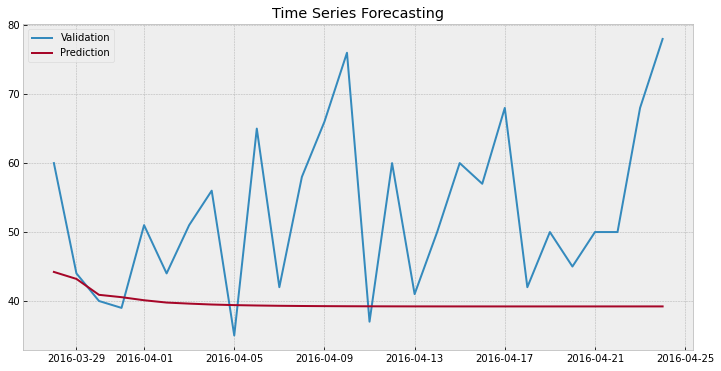

In [34]:
predictions_Ar_w_season = pd.DataFrame(predictions_Ar_w_season).T
summed = predictions_Ar_w_season.T.sum()
groundtruth = val_input.drop('ds',axis=1).T.sum()

plt.figure(figsize=(12,6))
plt.plot(val_input["ds"],groundtruth,label="Validation")
plt.plot(val_input["ds"],summed,label="Prediction")

plt.title("Time Series Forecasting")
plt.legend()

#RMSE of naive algorithm, seasonality did not improve prediction
rmse =  np.sqrt(mean_squared_error(groundtruth,summed))
print("RMSE:",rmse)

In [ ]:
prices['id'] = prices.item_id.astype(str) + "_" + prices.store_id.astype(str) + "_validation"



In [ ]:
#Prophet with external regressors, price



predictions_wPrice = []
for i in tqdm(range(len(train_input.columns)-1)):
    pro_model = Prophet()
    
    
    
    productName = merged3.columns[i]
    df_train = pd.DataFrame()
    df_test = pd.DataFrame()
    
    
    prices[productName]



    df_train['y'] = train_input[productName]
    df_train['ds'] = train_input['ds']
    
    df_val['y'] = val_input[productName]
    df_val['ds'] = val_input['ds']
    
    
    
    model.fit(df)
    future = model.make_future_dataframe(28,include_history=False)
    pred = model.predict(future)['yhat']
    predictions_wSeason.append(list(pred))




In [ ]:
#Prophet on entire dataset

predictions = []
for i in tqdm(range(len(merged3.columns)-1)):
    model = Prophet()
    productName = merged3.columns[i]
    df = pd.DataFrame()
    df['y'] = merged3[productName]
    df['ds'] = merged3['ds']
    
    
    model.fit(df)
    future = model.make_future_dataframe(28,include_history=False)
    pred = model.predict(future)['yhat']
    predictions.append(list(pred))



In [ ]:
BaslineProphet = pd.DataFrame(predictions).T



In [28]:
#Prophet with seasonality dataset

predictionswSeasonFinal = []
for i in tqdm(range(len(merged3.columns)-1)):
    model = Prophet(daily_seasonality=True)
    productName = merged3.columns[i]
    df = pd.DataFrame()
    df['y'] = merged3[productName]
    df['ds'] = merged3['ds']
    
    
    model.fit(df)
    future = model.make_future_dataframe(28,include_history=False)
    pred = model.predict(future)['yhat']
    predictionswSeasonFinal.append(list(pred))


<ipython-input-28-2575822a40d5>:4: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i in tqdm(range(len(merged3.columns)-1)):


In [35]:
predictionsArimaFinal = []
for i in tqdm(range(len(merged3.columns)-1)):
        
    productName = merged3.columns[i]
    df = pd.DataFrame()
    df['y'] = merged3[productName]
    df['ds'] = merged3['ds']
    df = df.set_index('ds')
    model = pm.auto_arima(df,start_p=0,start_q=0,test="adf",max_p=3,max_q=3,error_action="ignore",suppress_warnings=True,seasonal=False)

    pred = model.predict(28)
    predictionsArimaFinal.append(list(pred))

<ipython-input-35-62719854290c>:2: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i in tqdm(range(len(merged3.columns)-1)):


In [ ]:
#Converge forecasts without seasonality Prophet

forecastProphet = pd.DataFrame(predictions).T
forecastProphet.columns = merged3.drop('ds',axis=1).columns
forecastProphetT = forecastProphet.T
forecastProphetT.columns = sample.drop('id',axis=1).columns
forecastProphetT.reset_index().rename({"index":"id"},axis=1).set_index('id').to_csv('submissionProphet.csv')

In [29]:
#Converge forecasts with seasonality Prophet

forecastProphet = pd.DataFrame(predictionswSeasonFinal).T
forecastProphet.columns = merged3.drop('ds',axis=1).columns
forecastProphetT = forecastProphet.T
forecastProphetT.columns = sample.drop('id',axis=1).columns
forecastProphetT.reset_index().rename({"index":"id"},axis=1).set_index('id').to_csv('submission2_ProphetwithSeasonality.csv')

In [36]:
#Converge forecasts with seasonality Ar with season


modeldf = pd.DataFrame(predictionsArimaFinal).T
modeldf.columns = merged3.drop('ds',axis=1).columns
modeldfT = modeldf.T
modeldfT.columns = sample.drop('id',axis=1).columns
modeldfT.reset_index().rename({"index":"id"},axis=1).set_index('id').to_csv('Arimaf.csv')